# Project 2: Stickleback morphology - landmarks

In this project, phenopype is used to place morphometric landmarks across the anterior half of a stickleback (*Gasterosteus aculeatus*) stained with alizarin red. We also use the image-registration algorithm in `detect_reference` to find a reference card and automatically size and colour-correct the image.

<div style="display: flex; flex-direction: row; text-align:left; gap: 10px;"  class="row">
    
<div class="col-md-6" style="flex: 1 1 0px;">

![Before](_figures/project_2_before.jpg)

**Input** - Stained threespine stickleback, photographed in a glycerol bath from a camera stand
</div>
<div class="col-md-6" style="flex: 1 1 0px;">

    
![After](_figures/project_2_after.jpg)

**Results** - 22 landmarks are placed using the landmarks tool from the `measurements` module
</div>
</div>

Images kindly provided by Blake Matthews.

## Background

Functional morphology of organisms is often measured by placing landmarks at specific points that show structural, functional or developmental significance. Lake and stream ecotypes of threespine stickleback differ in their morphology: lake stickleback posess elongated spines and a set of tall bony lateral plates that cover most of the body, whereas stream ecotypes have shorter spines and a reduced plate coverage - i.e., fewer and shorter plates, as reviewed in [Hudson et al. (2021)](https://www.frontiersin.org/articles/10.3389/fevo.2020.611672/full).

## Preparation

This first step creates the necessary working directories and attempts to retrive the configuration template from the online repository, or your own machine, if you downloaded the repo.  

In [2]:
import phenopype as pp
import os

## change working dir - will contain project folder
os.chdir(r"D:\git-repos\phenopype\phenopype-gallery\_temp")

## set project name
project_name = "project_2"

## fetch template from downloaded template repo (https://github.com/phenopype/phenopype-templates)
template_path = r"D:\git-repos\phenopype\phenopype-templates\templates\gallery\project_2.yaml"

## set directory with images  
image_dir = r"D:\git-repos\phenopype\phenopype-gallery\gallery\data"

## Project

In [3]:
proj = pp.Project(project_name)

--------------------------------------------
Creating a new phenopype project directory at:
D:\git-repos\phenopype\phenopype-gallery\_temp\project_2

Proceed? (y/n)
y

Project "project_2" successfully created.
--------------------------------------------


In [5]:
## add all stickleback-images from the data folder, but exclude the two that don't belong to the series 
proj.add_files(image_dir = image_dir, include="stickle", exclude=["side","top"])

--------------------------------------------
phenopype will search for image files at

D:\git-repos\phenopype\phenopype-gallery\gallery\data

using the following settings:

filetypes: ['jpg', 'JPG', 'jpeg', 'JPEG', 'tif', 'png', 'bmp'], include: stickle, exclude: ['side', 'top'], mode: copy, recursive: False, resize: False, unique: path

Found image stickle1.jpg - phenopype-project folder 0__stickle1 created
Found image stickle2.jpg - phenopype-project folder 0__stickle2 created
Found image stickle3.jpg - phenopype-project folder 0__stickle3 created

Found 3 files - using all
--------------------------------------------


In [6]:
## add the config template; provide a tag
proj.add_config(template_path=template_path, tag="v1", overwrite=True)

- template saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\data\0__stickle1\pype_config_v1.yaml
- template saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\data\0__stickle2\pype_config_v1.yaml
- template saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\data\0__stickle3\pype_config_v1.yaml


Next we need to add information from a reference image to provide a project wide px-to-mm scale, which we will need to adjust our landmark coordinate space. This is important if for example the distance between the camera and your sample changes.  

<center>
<div style="width:600px; text-align: left">
    
![Adding a scale](_figures/project_2_scale.gif)
    
**Fig. 1:** Create a size reference - also see https://www.phenopype.org/docs/tutorials/tutorial_5/.
    
</div>
</center>

In [8]:
## set the project-wide reference. the reference has its own tag, in case your project uses multiple reference cards
proj.add_reference(reference_image_path= os.path.join(image_dir,"stickleback_side.jpg"), reference_tag="stickle-scale")

Reference set
Reference image saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\reference\stickle-scale_full_image.tif
Reference image saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\reference\stickle-scale_search_template.tif
Saved reference info to project attributes.
setting active global project reference to "stickle-scale" for 0__stickle1 (active=True)
setting active global project reference to "stickle-scale" for 0__stickle2 (active=True)
setting active global project reference to "stickle-scale" for 0__stickle3 (active=True)


<center>
<div style="width:600px; text-align: left">
    
![Adding a scale](_figures/project_2_high-throughput.gif)
    
**Fig. 2:** You can modify, for instance, point size and colour for the landmarks while adding them (or before adding the template). Note that point characteristics need to be changed separately for setting the landmarks and visualizing them (this goes for all GUI-annotations like masks, lines, etc.).
    
</div>
</center>

In [9]:
## run image processing
for path in proj.dir_paths:
    pp.Pype(path, tag="v1")


AUTOLOAD
- reference template image loaded from root directory
Stage: add annotation control args
Stage: add annotation control args
Stage: fixed method name
Stage: add annotation control args
Stage: fixed method name
Updating pype config: applying staged changes


------------+++ new pype iteration 2022-07-29 11:26:31 +++--------------




PREPROCESSING
detect_reference
---------------------------------------------------
Reference card found with 251 keypoint matches:
template image has 36.427 pixel per mm.
current image has 35.267 pixel per mm.
= 96.816 %% of template image.
---------------------------------------------------
write_comment
ID


MEASUREMENT
set_landmark
"get_annotation" failed!


VISUALIZATION
draw_landmark
draw_reference


EXPORT
save_annotation
- creating new annotation file
- no annotation_type selected - exporting all annotations
- writing annotations of type "reference" with id "a" to "annotations_v1.json"
- writing annotations of type "comment" with id "a" to "

In [10]:
## collect results and store in folder "<project-root>/results/annotations"
proj.collect_results("v1", "annotations", "annotations")

Created D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\results\annotations
Search string: ['annotations_v1']
Collected annotations_v1.json from 0__stickle1
0__stickle1_annotations_v1.json saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\results\annotations\0__stickle1_annotations_v1.json.
Collected annotations_v1.json from 0__stickle2
0__stickle2_annotations_v1.json saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\results\annotations\0__stickle2_annotations_v1.json.
Collected annotations_v1.json from 0__stickle3
0__stickle3_annotations_v1.json saved under D:\git-repos\phenopype\phenopype-gallery\_temp\project_2\results\annotations\0__stickle3_annotations_v1.json.



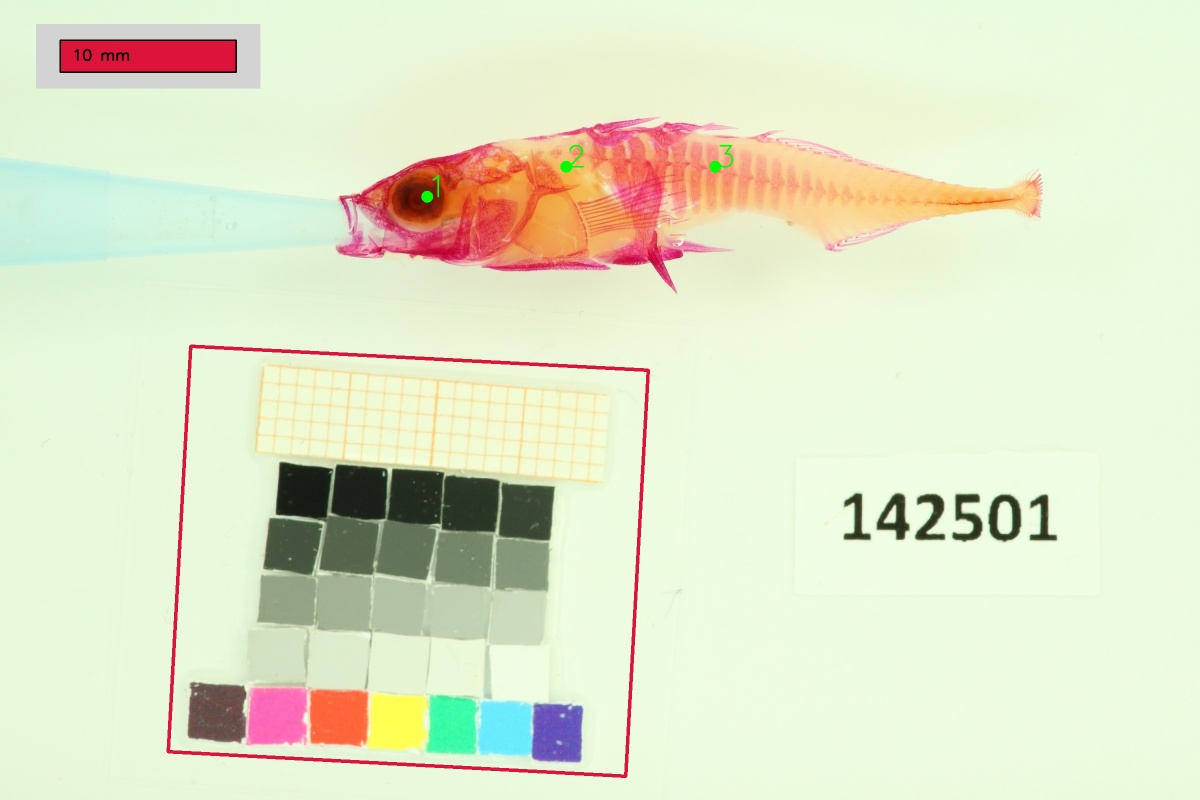
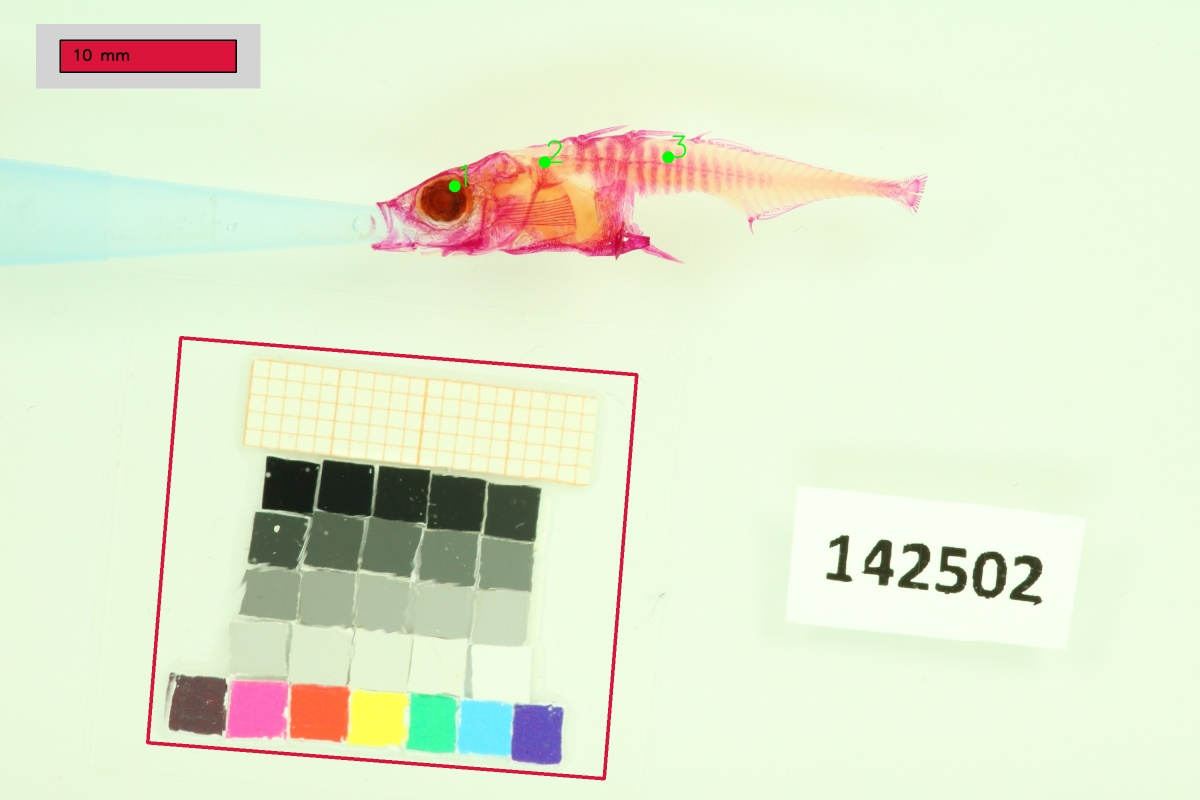
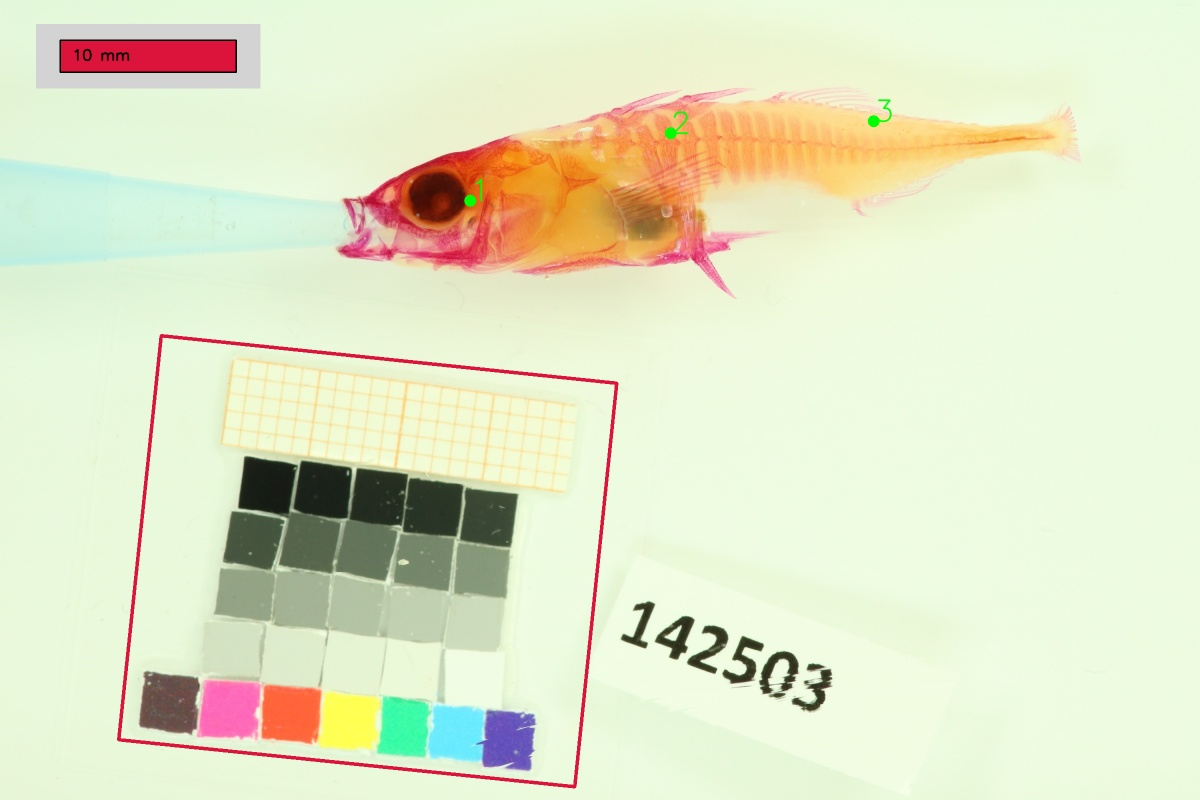


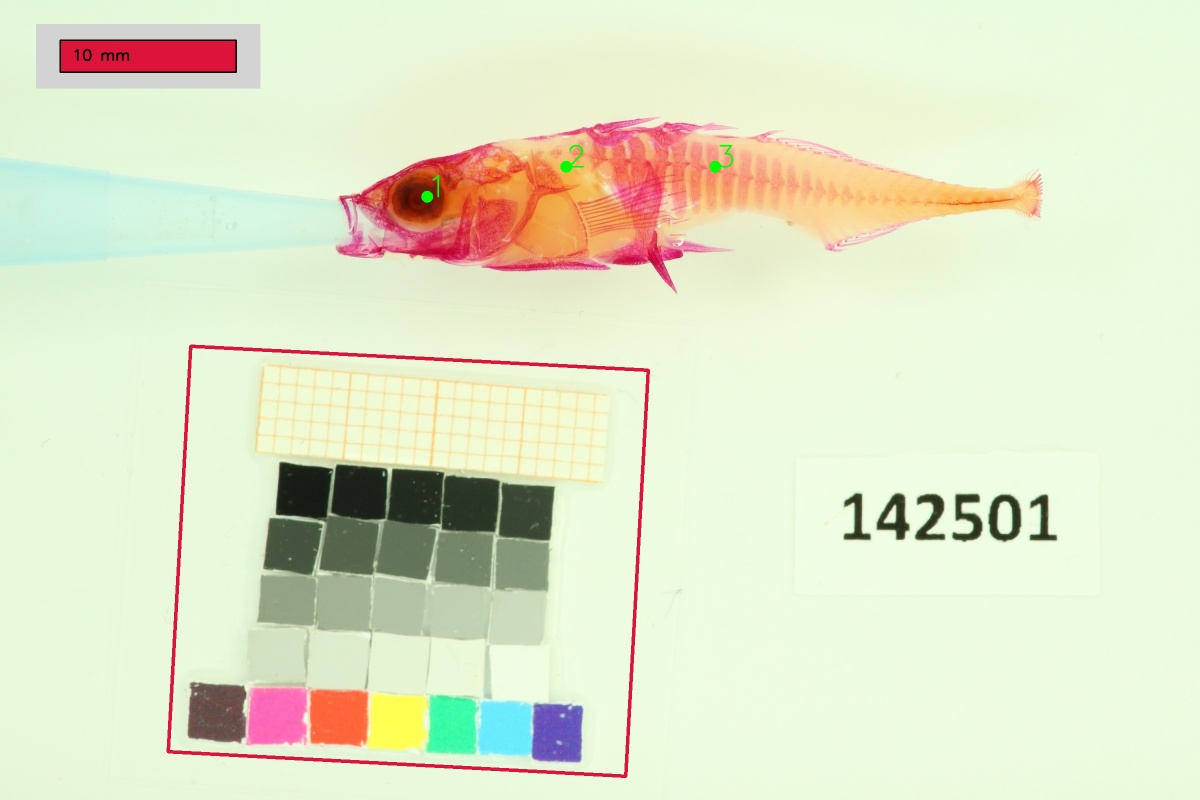
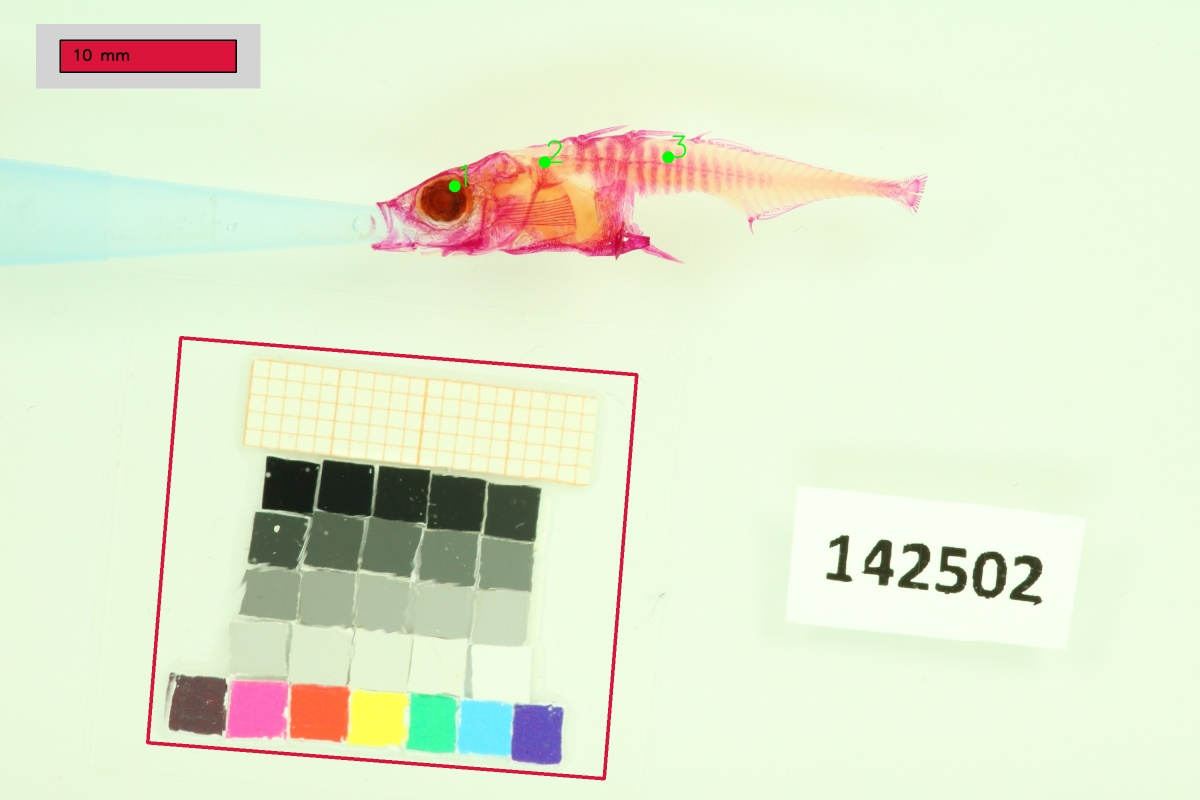
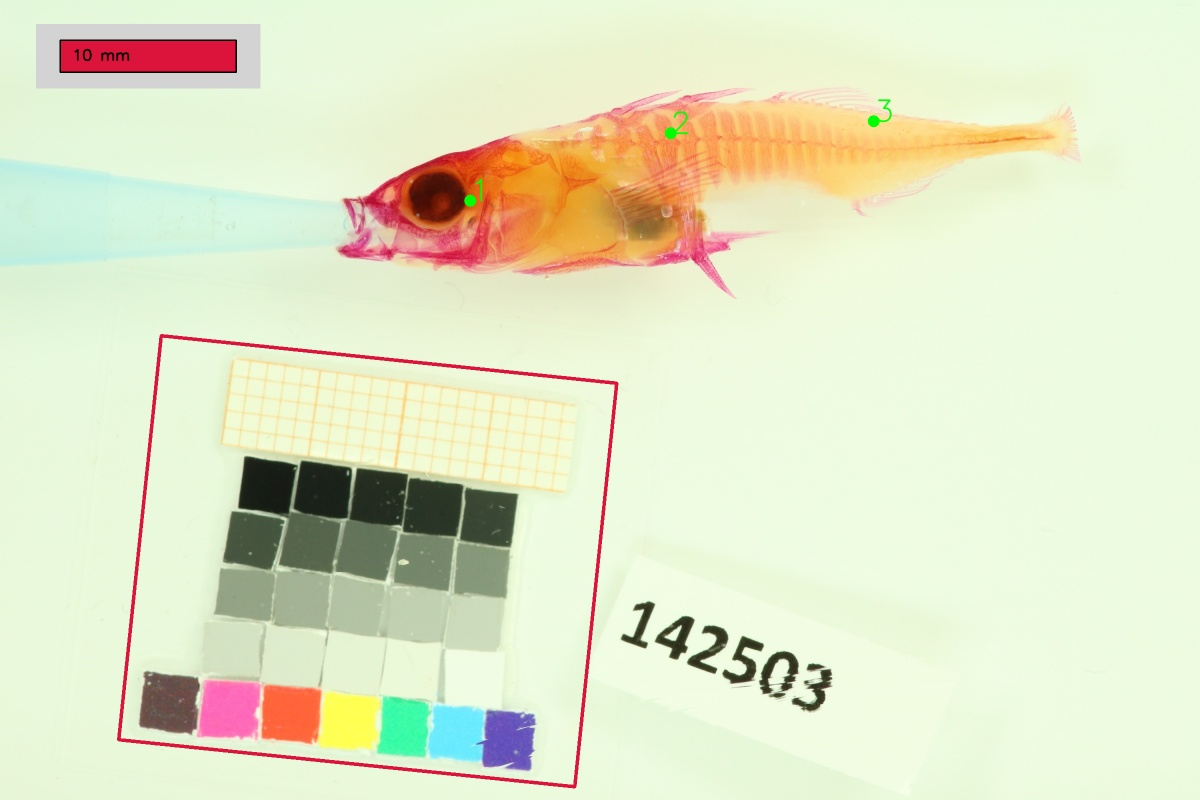

In [13]:
## display results
import ipyplot ## install with `pip install ipyplot`

canvas_list = []
for path in proj.dir_paths:
    canvas_list.append(pp.load_image(os.path.join(path, "canvas_v1.jpg"), mode="rgb"))

ipyplot.plot_images(canvas_list, img_width=300)